# Expressibility: gather and plot results

In [4]:
# Plotting libraries and setting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

import seaborn as sns
cmap = sns.color_palette(as_cmap=True)
sns.set_context("paper")

# Useful libraries
import numpy as np
import json
from tqdm import tqdm
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Simulation experiment
from qcircha.utils import gather_data, list_data
from qcircha.circuit_selector import pick_circuit

# Path of the simulation data
data_path = "./data/data/expr/"
list_data(path=data_path)

['2022-03-09_17-50-48_197',
 '2022-03-09_17-55-31_362',
 '2022-03-10_09-02-54_218',
 '2022-03-09_17-52-19_217',
 '2022-03-09_17-50-17_554',
 '2022-03-09_17-49-59_566',
 '2022-03-09_17-49-45_828',
 '2022-03-10_09-04-14_156',
 '2022-03-10_09-04-17_959',
 '2022-03-10_09-02-42_900',
 '2022-03-10_09-04-36_534',
 '2022-03-09_17-54-56_369',
 '2022-03-09_17-52-24_367',
 '2022-03-09_17-50-42_854',
 '2022-03-09_17-53-44_103',
 '2022-03-09_17-50-34_103',
 '2022-03-09_17-54-02_925',
 '2022-03-10_09-04-33_590',
 '2022-03-09_17-53-51_815',
 '2022-03-09_17-53-26_62',
 '2022-03-10_09-04-10_697',
 '2022-03-09_17-50-27_711',
 '2022-03-09_17-49-52_759',
 '2022-03-09_17-55-18_53',
 '2022-03-10_09-02-27_260',
 '2022-03-09_17-54-46_355',
 '2022-03-09_17-53-36_629',
 '2022-03-10_09-02-17_330',
 '2022-03-09_17-49-28_129',
 '2022-03-10_09-04-29_570']

## Example of usage

In [ ]:
# Provide keys in the json file, and corresponding desired value
data_runs = gather_data(key=['n_bins', 'num_qubits','fmap', 'var_ansatz'],
                        value=[100, 8, 'identity', 'TwoLocal_parametricRz'],
                        path=data_path)

# Select a run from those satisfying (key, values) requirements above
idx_run = 0
run = data_runs[idx_run]
print(f"{len(data_runs)} runs available. Selecting run: {run}")

expr_data = np.load(data_path + run + ".npy", allow_pickle=True)
with open(data_path + run + '.json') as file:
    expr_metadata = json.load(file)
pp.pprint(expr_metadata)

In [ ]:
fig = plt.figure(figsize=(9.6, 6))

plt.ylabel(r"Expressivity $D_{KL}$")
plt.xlabel("Number of layers, $L$")

plt.yscale('log')
plt.plot(range(1, len(expr_data)+1), expr_data, marker='o', ls='--')
plt.tight_layout()

## Expressibility plot

Selecting data

In [10]:
# SELECTING FIRST QNN ARCHITECTURE
data_runs = gather_data(key=['n_bins', 'num_qubits', 'fmap', 'var_ansatz', 'var_entanglement'],
                        value=[100, 8, 'ZZFeatureMap', 'TwoLocal', 'linear'],
                        path=data_path)
                     
expr_data = []
for run in data_runs:
    expr_data.append(np.load(data_path + run + ".npy", allow_pickle=True))
expr_data = np.array(expr_data)
expr_data = np.mean(expr_data, axis = 0)
print(f"Averaging over {len(data_runs)} runs")
# --------------------------------------------------------------


# SELECTING SECOND QNN ARCHITECTURE
data_runs = gather_data(key=['n_bins', 'num_qubits', 'fmap', 'var_ansatz', 'var_entanglement'],
                        value=[100, 8, 'TwoLocal', 'TwoLocal', 'linear'],
                        path=data_path)

expr_data1 = []
for run in data_runs:
    expr_data1.append(np.load(data_path + run + ".npy", allow_pickle=True))
expr_data1 = np.array(expr_data1)
expr_data1 = np.mean(expr_data1, axis=0)
print(f"Averaging over {len(data_runs)} runs")
# --------------------------------------------------------------


# SELECTING THIRD QNN ARCHITECTURE
data_runs = gather_data(key=['n_bins', 'num_qubits', 'fmap', 'var_ansatz', 'var_entanglement'],
                        value=[100, 8, 'TwoLocal_parametricRz', 'TwoLocal', 'linear'],
                        path=data_path)

expr_data2 = []
for run in data_runs:
    expr_data2.append(np.load(data_path + run + ".npy", allow_pickle=True))
expr_data2 = np.array(expr_data2)
expr_data2 = np.mean(expr_data2, axis=0)
print(f"Averaging over {len(data_runs)} runs")
# --------------------------------------------------------------


# SELECTING FOURTH QNN ARCHITECTURE
data_runs = gather_data(key=['n_bins', 'num_qubits', 'fmap', 'var_ansatz', 'var_entanglement'],
                        value=[100, 8, 'circuit1', 'TwoLocal', 'linear'],
                        path=data_path)

expr_data3 = []
for run in data_runs:
    expr_data3.append(np.load(data_path + run + ".npy", allow_pickle=True))
expr_data3 = np.array(expr_data3)
expr_data3 = np.mean(expr_data3, axis=0)
print(f"Averaging over {len(data_runs)} runs")
# --------------------------------------------------------------



data_to_plot = [expr_data, expr_data1, expr_data2, expr_data3]


Averaging over 4 runs
Averaging over 4 runs
Averaging over 4 runs
Averaging over 4 runs


Plot

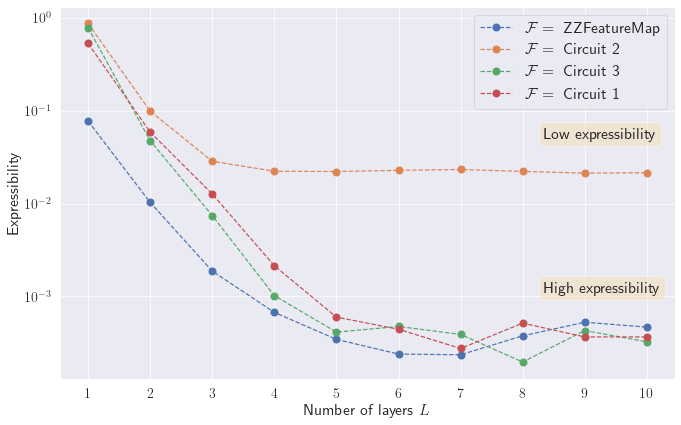

In [14]:
fig = plt.figure(figsize=(9.6, 6))

plt.ylabel("Expressibility", fontsize=16)
plt.xlabel("Number of layers $L$", fontsize=16)
plt.yscale('log')

#plt.plot([], [], lw=0, label="$n=8$")
#plt.plot([], [], lw=0, label="Linear entanglement")
#plt.plot([], [], lw=0, color='grey', label="$V =\:$ Circuit 2")

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor = 'w')
plt.text(8.35, 5e-2, "Low expressibility", bbox=props,  fontsize=16)
plt.text(8.35, 1.1e-3, "High expressibility", bbox = props, fontsize = 16)


# Check the order with the cell above!
names = ['$\mathcal{F} =\:$ ZZFeatureMap', '$\mathcal{F} =\:$ Circuit 2',
         '$\mathcal{F} =\:$ Circuit 3', '$\mathcal{F} =\:$ Circuit 1']

alphas = np.ones(len(data_to_plot)) #np.linspace(0.4, 1, len(data_to_plot))[::-1]
for idx, d in enumerate(data_to_plot):
    plt.plot(range(1, len(d)+1), d, color=cmap[idx], alpha=alphas[idx], marker='o', ls='--', label=names[idx], markersize=7)

plt.xticks(range(1, 11), fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("expr_linear_comparison_new.pdf", format = 'pdf')

## Additional custom simulations

In [ ]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qcircha.expressivity import compute_espressivity

In [ ]:
%%capture
nq = 8
circ = TwoLocal(nq, ['rx'], 'cx', 'linear', reps=1, skip_final_rotation_layer=True)
a = compute_espressivity(nq, nq, feature_map='TwoLocal', var_ansatz='TwoLocal', backend='Aer', path=None, plot=False, save=False)

circ = TwoLocal(nq, ['rx'], 'cx', 'linear', reps=1, skip_final_rotation_layer=True)
b = compute_espressivity(nq, nq, feature_map='TwoLocal', var_ansatz=circ, backend='Aer', path=None, plot=False, save=False)

circ = 'circuit15' # TwoLocal(nq, ['rx'], 'cx', 'linear', reps=1, skip_final_rotation_layer=True)
c = compute_espressivity(nq, nq, feature_map='Identity', var_ansatz=circ, backend='Aer', path=None, plot=False, save=False)

In [ ]:
fig = plt.figure(figsize=(9.6, 6))

plt.ylabel(r"Expressivity $D_{KL}$")
plt.xlabel("Number of layers, $L$")

plt.yscale('log')
plt.plot(range(1, len(a)+1), a, marker='o', ls='--', label="a")
plt.plot(range(1, len(b)+1), b, marker='o', ls='--', label="b")
plt.plot(range(1, len(c)+1), c, marker='o', ls='--', label="c")

plt.legend()
plt.tight_layout()
